### If (colab):

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version
!pip install pyspark

## else:

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('adult.csv')
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [44]:
df.shape

(48842, 15)

In [45]:
for c in df.columns:
    print(f"----{c}----")
    print(df[c].value_counts())

----age----
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
----workclass----
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
----fnlwgt----
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
131379     1
160061     1
334224     1
45381      1
208174     1
Name: fnlwgt, Length: 28523, dtype: int64
----education----
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
P

In [46]:
df.drop(['educational-num', 'age', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss', 'native-country'], axis=1, inplace=True)

In [47]:
df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,<=50K


In [50]:
df.isin(["?"]).sum(axis=0)

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
income            0
dtype: int64

In [49]:
df['workclass'] = df ['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)

df.dropna(how='any', inplace=True)

In [51]:
df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,<=50K


In [52]:
df['income'].value_counts()

<=50K    34611
>50K     11422
Name: income, dtype: int64

In [53]:
df['income'] = df['income'].map({'<=50K':0, '>50K':1})
df['gender'] = df['gender'].map({"Male":0, "Female":1})

In [55]:
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                             'Amer-Indian-Eskimo': 4})
df['marital-status'] = df['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                 'Married-civ-spouse': 2, 'Separated': 3, 
                                                 'Divorced': 4,'Never-married': 5, 
                                                 'Married-AF-spouse': 6})
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 
                                       'Without-pay': 3, 'Local-gov': 4,'Private': 5, 
                                       'Self-emp-not-inc': 6})
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 
                                       'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 
                                       'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 
                                       'Doctorate': 10, '11th': 11,'Bachelors': 12, 
                                       '10th': 13,'Assoc-voc': 14,'9th': 15})
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 
                                         'Adm-clerical': 3, 'Handlers-cleaners': 4, 
                                         'Prof-specialty': 5,'Machine-op-inspct': 6, 
                                         'Exec-managerial': 7,'Priv-house-serv': 8,
                                         'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 
                                         'Armed-Forces': 12, 'Other-service': 13,
                                         'Protective-serv':14})
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 
                                             'Unmarried': 3,'Husband': 4,'Own-child': 5})

In [56]:
df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,5,11,5,6,5,0,0,0
1,5,3,2,1,4,3,0,0
2,4,9,2,14,4,3,0,1
3,5,0,2,6,4,0,0,1
5,5,13,5,13,0,3,0,0


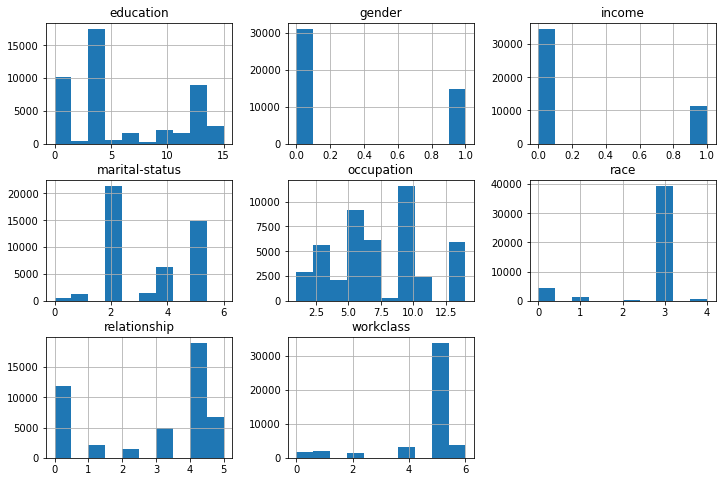

In [60]:
%matplotlib inline

df.hist(figsize=(12,8))
plt.show()

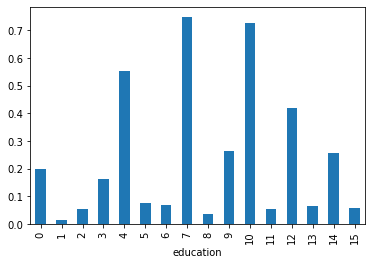

In [61]:
df.groupby('education').income.mean().plot(kind="bar")

In [63]:
df_x = df.drop('income', axis=1)
df_y = pd.Series(df['income'])
df_x

,workclass,education,marital-status,occupation,relationship,race,gender
0,5,11,5,6,5,0,0
1,5,3,2,1,4,3,0
2,4,9,2,14,4,3,0
3,5,0,2,6,4,0,0
5,5,13,5,13,0,3,0
...,...,...,...,...,...,...,...
48837,5,9,2,2,1,3,1
48838,5,3,2,6,4,3,0
48839,5,3,1,3,3,3,1
48840,5,3,5,3,5,3,0


In [65]:
df_y

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 46033, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=13)

x_test.shape

(15191, 7)

In [73]:
model.fit(x_train, y_train)

LogisticRegression()

In [74]:
y_pred = model.predict(x_test)

In [78]:
accuracy_score(y_test, y_pred)

0.7553814758738727

## SPARK

In [5]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

In [6]:
spark = SparkSession.builder.appName("IncomeApp").getOrCreate()

In [7]:
schema = StructType([
    StructField("age", IntegerType(), True),
    StructField("workclass", StringType(), True),
    StructField("fnlwgt", IntegerType(), True),
    StructField("education", StringType(), True),
    StructField("education-num", IntegerType(), True),
    StructField("marital-status", StringType(), True),
    StructField("occupation", StringType(), True),
    StructField("relationship", StringType(), True),
    StructField("race", StringType(), True),
    StructField("sex", StringType(), True),
    StructField("capital-gain", IntegerType(), True),
    StructField("capital-loss", IntegerType(), True),
    StructField("hours-per-week", IntegerType(), True),
    StructField("native-country", StringType(), True),
    StructField("income", StringType(), True)
])
df = spark.read.csv('adult.csv', header=False, schema=schema)